In [1]:
import numpy as np

# Perceptron function with changes in loop structure and naming
def perceptron(X, y, max_iters=1000):
    weights = np.zeros(X.shape[1])  # initialize weights to zero
    for _ in range(max_iters):
        errors = 0  # track if there are any misclassifications
        for idx in range(X.shape[0]):
            if np.sign(np.dot(X[idx], weights)) != y[idx]:  # check for misclassified point
                weights += y[idx] * X[idx]  # update weights
                errors += 1  # track misclassification
        if errors == 0:  # stop if no errors in classification
            break
    return weights


In [7]:
import matplotlib.pyplot as plt

np.random.seed(0)
positive_class = []
negative_class = []

while len(positive_class) < 200:
    x1, x2 = np.random.uniform(-10, 10, 2)
    if 3 * x1 + 4 * x2 - 10 > 0:
        positive_class.append([1, x1, x2])  # add bias term, x0 = 1

while len(negative_class) < 200:
    x1, x2 = np.random.uniform(-10, 10, 2)
    if 3 * x1 + 4 * x2 - 10 < 0:
        negative_class.append([1, x1, x2])  # add bias term, x0 = 1

positive_class = np.array(positive_class)
negative_class = np.array(negative_class)


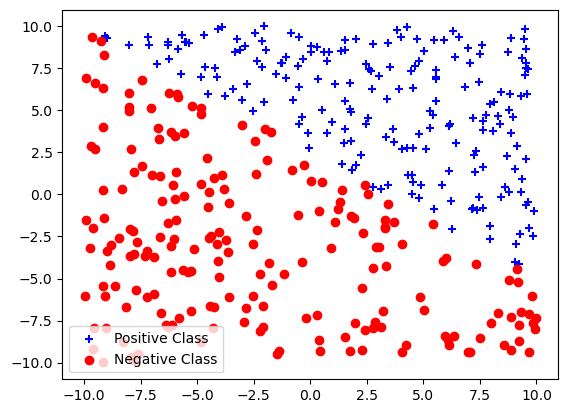

In [8]:
plt.scatter(positive_class[:, 1], positive_class[:, 2], marker='+', color='b', label='Positive Class')
plt.scatter(negative_class[:, 1], negative_class[:, 2], marker='o', color='r', label='Negative Class')
plt.legend()
plt.show()


# Function to plot decision boundary with added flexibility
def plot_decision_boundary(weights, color, style='-'):
    x_range = np.array([-10, 10])
    y_range = -(weights[1] * x_range + weights[0]) / weights[2]  # compute boundary line
    plt.plot(x_range, y_range, color=color, linestyle=style)


C:\Users\malee\AppData\Local\Temp\ipykernel_14984\3158714975.py:11: RuntimeWarning: invalid value encountered in divide
  y_range = -(weights[1] * x_range + weights[0]) / weights[2]  # compute boundary line


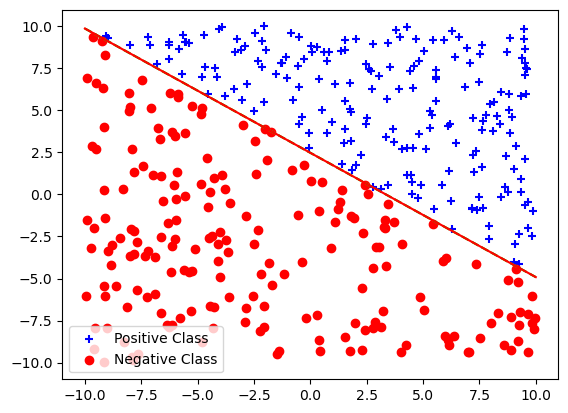

In [9]:
combined_data = np.vstack([positive_class, negative_class])
labels = np.hstack([np.ones(200), -np.ones(200)])

# Get final weights after running perceptron
final_weights = perceptron(combined_data, labels)

plt.scatter(positive_class[:, 1], positive_class[:, 2], marker='+', color='b', label='Positive Class')
plt.scatter(negative_class[:, 1], negative_class[:, 2], marker='o', color='r', label='Negative Class')

# Initial decision boundary (before training)
plot_decision_boundary(np.zeros(3), 'red', style='-')

# Intermediate boundaries
plot_decision_boundary(final_weights * 0.3, 'yellow', style='--')
plot_decision_boundary(final_weights * 0.7, 'green', style='--')

# Final decision boundary
plot_decision_boundary(final_weights, 'red', style='-')

plt.legend()
plt.show()